## Vandna_Shobran_Project_ML

## "Predicting Opioid Overdose Risk Using Public Health and Socioeconomic Data."

Abstract / Introduction:

One of the deadliest and most pressing public health crises in the US is still the opioid crisis. Overdose deaths have sharply increased in recent years due to the broad availability of prescription opioids and the growth of synthetic drugs like fentanyl. Despite municipal and federal attempts to address this situation, the statistics are nonetheless concerning. Data-driven technologies that can enable life-saving actions, predict dangers, and assist in discovering patterns are more important than ever.

I chose this project because the opioid crisis doesn’t just impact individuals; it touches families, communities, and the entire structure of our society. What drew me to this topic is not just the technical challenge, but the real-world impact that thoughtful data analysis can have. This isn’t just a class project; it’s a step toward understanding a national emergency that affects all of us, directly or indirectly.

Data.gov provided the used dataset, "Drug Overdose Death Rates by Drug Type, Sex, Age, Race, and Hispanic Origin: United States." With comprehensive demographic breakdowns and death estimates by year and medication type, it has almost 6,000 entries. We can examine the relationship between overdose risk and variables such as age, race, gender, and substance type, thanks to the dataset.

Recent academic research supports the use of machine learning in predicting opioid-related outcomes. For example, a study published in The Lancet Digital Health developed a machine learning model that predicted 3-month overdose risk among Medicaid beneficiaries with a C-statistic of over 0.84 across multiple states, demonstrating the real-world potential of these techniques. Similarly, a review published in npj Digital Medicine analyzed 44 machine learning studies focused on opioid-related harms, concluding that supervised learning models hold promise for public health monitoring. Another study published on PubMed Central used electronic health records to build high-accuracy models that identified patients at risk of overdose with up to 99% precision.

The goal of this project is to build a machine learning classification model that can predict whether a demographic group is at high risk or low risk of opioid overdose. Through exploratory data analysis, we will uncover the underlying trends. With feature engineering, we’ll transform raw data into meaningful inputs. Then, using supervised learning models such as logistic regression, decision trees, and ensemble techniques, we’ll evaluate which patterns are most predictive of overdose outcomes.

But the goal goes beyond just model accuracy. We aim to surface insights that could inform public health decisions—whether that’s identifying the most vulnerable groups, highlighting regional or demographic disparities, or proposing the types of data that health agencies should track more closely. If our model can even slightly improve how interventions are targeted, it could help reduce suffering and save lives.

This project is not just an academic exercise it is a call to apply data science for social good, to analyze a crisis that is ongoing and deeply human. It is a chance to see how the tools we learn in the classroom can directly serve the communities around us.

Technical Roadmap:

I will begin with exploratory data analysis (EDA) to visualize trends and uncover relationships.

I will perform data cleaning and engineer a binary classification label based on overdose risk.

I will apply categorical encoding and feature scaling where needed.

I will train and compare multiple classification models, including logistic regression, decision tree, and random forest.

I will use evaluation metrics such as precision, recall, F1-score, and ROC-AUC to assess model performance.

I will visualize feature importance and identify key risk factors.

At the end, I will conclude with recommendations for public health action and ideas for future model improvement.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [92]:
# Let's Load our dataset
df = pd.read_csv("opioid_data.csv")  

# Basic overview
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   int64  
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE             6228 non-null   object 
 12  AGE_NUM         6228 non-null   float64
 13  ESTIMATE        5117 non-null   float64
 14  FLAG            1111 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 730.0+ KB


Our dataset contains 6,228 records and 15 columns. Most fields are complete, but `ESTIMATE` (target variable) and `FLAG` contain missing values. There are a mix of categorical (`object`), numerical (`int64`, `float64`) features, making it suitable for classification after preprocessing.

In [96]:
print("\nFirst 5 rows:")
display(df.head())


First 5 rows:


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


After loading the dataset, we confirmed that all columns have the appropriate data types for analysis. Categorical features like AGE, STUB_LABEL, and INDICATOR are stored as object types, while numerical fields like ESTIMATE, YEAR, and encoded demographic codes are properly stored as integers or floats. This ensured a smooth pipeline for encoding, scaling, and modeling later in the project.

In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE          1111
FLAG              5117
dtype: int64


Here w ecan see only two columns have missing values nad these are very important for us.

ESTIMATE (1111 missing):
This is our target variable (death rate), so we cannot impute or guess it.

FLAG (5117 missing)
This column seems to be notes or warnings, probably used by the CDC to mark data that’s suppressed or unreliable.

It is not needed for modeling unless we want to explore data quality issues.


In [11]:
# Look at rows where overdose rate is missing
missing_estimate = df[df['ESTIMATE'].isna()]
print("Missing ESTIMATE rows:", missing_estimate.shape[0])
missing_estimate[['INDICATOR', 'AGE', 'STUB_LABEL', 'YEAR']].head(10)

Missing ESTIMATE rows: 1111


,INDICATOR,AGE,STUB_LABEL,YEAR
1104,Drug overdose death rates,All ages,Male: Asian or Pacific Islander,1999
1184,Drug overdose death rates,All ages,Female: Asian or Pacific Islander,1999
1185,Drug overdose death rates,All ages,Female: Asian or Pacific Islander,2000
1186,Drug overdose death rates,All ages,Female: Asian or Pacific Islander,2001
1187,Drug overdose death rates,All ages,Female: Asian or Pacific Islander,2002
1188,Drug overdose death rates,All ages,Female: Asian or Pacific Islander,2003
1286,Drug overdose death rates,All ages,Male: Not Hispanic or Latino: Asian or Pacific...,1999
1388,Drug overdose death rates,All ages,Female: Not Hispanic or Latino: Asian or Pacif...,1999
1389,Drug overdose death rates,All ages,Female: Not Hispanic or Latino: Asian or Pacif...,2000
1390,Drug overdose death rates,All ages,Female: Not Hispanic or Latino: Asian or Pacif...,2001


What we’re seeing confirms a very common and important pattern:
Most of the missing ESTIMATE values are for Asian or Pacific Islander groups, particularly in early years like 1999–2003.

What This Means:

These values were likely suppressed by the CDC due to low case counts (often done for privacy or statistical reliability).

These missing entries are not random, they’re tied to specific demographic groups and years.

Since my goal is predictive modeling, and ESTIMATE is my target, keeping rows without it will cause problems (I can't train a model without target values).

In [13]:
df.duplicated().sum()

0

In [15]:
df.describe()

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,5117.000000
mean,2.500000,1.578035,3.028902,3.383006,2008.664740,10.664740,1.354913,4.743443
std,1.707962,0.493913,1.447036,1.526819,5.849512,5.849512,0.301459,6.424471
min,0.000000,1.000000,0.000000,0.100000,1999.000000,1.000000,1.100000,0.000000
25%,1.000000,1.000000,2.000000,2.100000,2004.000000,6.000000,1.100000,0.800000
50%,2.500000,2.000000,3.000000,3.220000,2009.000000,11.000000,1.200000,2.100000
75%,4.000000,2.000000,4.000000,4.600000,2014.000000,16.000000,1.600000,6.000000
max,5.000000,2.000000,5.000000,5.930000,2018.000000,20.000000,1.910000,54.300000


This output provides basic statistics for several numeric columns in the dataset. Most columns have 6,228 entries, but the ESTIMATE column has only 5,117, meaning it contains missing values. The data spans from the year 1999 to 2018, and overdose death rates (ESTIMATE) range widely from 0.0 to 54.3, with an average of 4.74, showing significant variation across groups. Columns like PANEL_NUM, UNIT_NUM, and STUB_NAME_NUM are likely coded versions of categories. While this output helps understand the range and distribution of each variable, it does not show whether these variables are related — further analysis is needed to check correlations or patterns.

In [17]:
for col in df.select_dtypes(include='object'):
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("-" * 40)

Value counts for INDICATOR:
INDICATOR
Drug overdose death rates    6228
Name: count, dtype: int64
----------------------------------------
Value counts for PANEL:
PANEL
All drug overdose deaths                                                         1038
Drug overdose deaths involving any opioid                                        1038
Drug overdose deaths involving natural and semisynthetic opioids                 1038
Drug overdose deaths involving methadone                                         1038
Drug overdose deaths involving other synthetic opioids (other than methadone)    1038
Drug overdose deaths involving heroin                                            1038
Name: count, dtype: int64
----------------------------------------
Value counts for UNIT:
UNIT
Deaths per 100,000 resident population, crude           3600
Deaths per 100,000 resident population, age-adjusted    2628
Name: count, dtype: int64
----------------------------------------
Value counts for STUB_NAME:
STU

Value counts for INDICATOR:

The INDICATOR column contains only one unique value: "Drug overdose death rates", repeated for all 6,228 rows. This tells us that the entire dataset is focused specifically on drug overdose death rates, so this column doesn’t add variation and won't be useful for grouping or modeling. It can be thought of as a label or constant descriptor of the dataset.

Value counts for PANEL:

The PANEL column describes the type of drug involved in the overdose death. There are 6 different drug categories, each with 1,038 records, suggesting the dataset is evenly split across these types. This column is very important for analysis, as it allows us to compare overdose death rates by specific substances, such as heroin, methadone, and synthetic opioids. It can be used for grouping, trend analysis, or creating visualizations of how different drugs contribute to the overall death rates.

Value counts for UNIT:

The UNIT column indicates the type of rate being reported. There are two types:

Crude rate (3600 records): This is the raw number of deaths per 100,000 people, not adjusted for differences in age across populations.

Age-adjusted rate (2628 records): This rate accounts for age differences, making it better for comparing populations with different age structures.

Since both units are present in large numbers, this column is useful for comparing how results might differ when using raw vs. standardized metrics. It may be helpful to analyze or plot these separately, especially in public health research where age-adjustment is standard practice.

Value counts for STUB_NAME:

The STUB_NAME column describes the demographic breakdown used to organize the data. It shows how the dataset is segmented — for example, by:

Sex and age (most common),

Sex and race,

Age only, or

Just sex or totals.

The most frequent breakdown is “Sex and age” (2160 rows), indicating that a large portion of the data is detailed by both gender and age group. Less common but still notable groupings involve Hispanic origin and single race identifiers.

This column is useful for understanding how detailed each demographic record is. It can also guide which columns to group by or analyze — for example, choosing between broader categories like "Sex" vs. more granular ones like "Sex and race and Hispanic origin."

Value counts for STUB_LABEL:

The STUB_LABEL column contains detailed demographic labels that describe the population group each record refers to. These include combinations of:

Sex (Male, Female)

Race (e.g., White, Black or African American, Asian)

Hispanic origin

Age groups (e.g., 15–24 years, 75–84 years)

Totals (e.g., “All persons”)

Some labels appear 240 times (e.g., “All persons”, “Male”, “Female”) these likely reflect general or total population categories.
Other labels, such as “Male: Not Hispanic or Latino: White” or “Female: 55–64 years”, appear 120 or 126 times, showing that the dataset includes intersectional breakdowns which is great for in-depth demographic analysis.

There are also a few labels with very low frequency (only 6 times), such as Native Hawaiian or Other Pacific Islander subgroups which could be due to small population sizes or suppressed reporting.

Overall, this column will be essential if I want to analyze trends by specific demographic groups, and it may be worth grouping or cleaning some rare subcategories to simplify analysis or visualizations.

Value counts for AGE:

The AGE column shows the age group each record corresponds to. Most age-specific groups (e.g., "15–24 years", "75–84 years") have an equal number of entries (360 each), indicating that the dataset is evenly distributed across different age categories.

The "All ages" group appears 2,988 times, which is significantly more frequent. These entries likely represent summary totals for all age groups combined and may be useful for high-level trend analysis — but should be handled separately from age-specific records during modeling or visualizations to avoid duplication or skewed results.

This column is key for understanding how drug overdose death rates vary by age, and it's useful for plotting age-wise trends or identifying vulnerable age brackets.

Value counts for FLAG:

The FLAG column contains an asterisk (*) for 1,111 records, and is empty (missing) for the rest. In government datasets, an asterisk usually indicates suppressed or unreliable data for example, values that are too small to report, or estimates with high uncertainty.

These flagged rows should be treated with caution. Depending on the analysis, you may choose to:

Exclude them to ensure accuracy.

Or mark them separately if you’re analyzing data completeness or limitations.

The presence of these flags highlights the need to be careful when interpreting the affected rows, especially if you're calculating averages or trends.

In [19]:
# Keep original dataset untouched
df_original = df.copy()

# Create a copy for modeling with complete target values
df_model = df[df['ESTIMATE'].notna()].copy()

In [21]:
missing_target_data = df[df['ESTIMATE'].isna()].copy()

Target Separation for Modeling

To avoid training on incomplete data, we filtered the dataset into two subsets:

df_model includes only rows where the target variable `ESTIMATE` is present. This subset will be used for training and evaluating our classification models.
missing_target_data contains rows with missing `ESTIMATE` values. These rows will be excluded from model training but may be revisited for prediction or analysis later.

We also preserved the full original dataset as `df_original` to maintain flexibility for further exploration.

In [23]:
# Rank Age Groups by Average Overdose Rate
df.groupby('AGE')['ESTIMATE'].mean().sort_values(ascending=False)

AGE
45-54 years          8.617222
35-44 years          8.462778
25-34 years          7.459722
55-64 years          5.116571
All ages             4.423863
15-24 years          3.066761
85 years and over    2.423485
65-74 years          1.937370
75-84 years          1.507650
Under 15 years       0.129677
Name: ESTIMATE, dtype: float64

Overdose Rate by Age Group

We ranked all age groups by their average overdose death rate (per 100,000 people). Here are the top results:

45–54 years → 8.62 deaths per 100,000  
35–44 years → 8.46  
25–34 years → 7.46  

These three groups have the highest average overdose rates, highlighting that the crisis disproportionately affects core working-age adults, not just teenagers or the elderly.

Meanwhile, groups like:
Under 15 years (0.13)
75–84 years (1.51)
85+ years (2.42)

have significantly lower overdose rates. This suggests that public health prevention strategies should prioritize adults aged 25 to 54, especially during peak working years.

In [25]:
# Rank Demographic Groups (STUB_LABEL) by Risk
df.groupby('STUB_LABEL')['ESTIMATE'].mean().sort_values(ascending=False).head(10)

STUB_LABEL
Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander    17.700000
Male: 35-44 years                                                          11.090000
Male: 45-54 years                                                          10.609167
Male: 25-34 years                                                          10.597500
Male: Not Hispanic or Latino: American Indian or Alaska Native              9.173913
45-54 years                                                                 8.597500
35-44 years                                                                 8.456667
Male: Not Hispanic or Latino: White                                         7.811111
25-34 years                                                                 7.480000
Male: White                                                                 6.982540
Name: ESTIMATE, dtype: float64

Overdose Risk by Demographic Group (`STUB_LABEL`)

We calculated the average overdose death rate across all demographic subgroups defined in the `STUB_LABEL` column. Here are the top 10 highest-risk groups:

Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander → 17.7 deaths per 100,000  
Male: 35–44 years → 11.09  
Male: 45–54 years → 10.61  
Male: 25–34 years → 10.60  
Male: Not Hispanic or Latino: American Indian or Alaska Native → 9.17  
45–54 years (combined) → 8.60  
35–44 years (combined) → 8.46  
Male: Not Hispanic or Latino: White → 7.81  
25–34 years (combined) → 7.48  
Male: White → 6.98  

These results reveal several key trends:

Overdose risk is highly concentrated among middle-aged men, especially those in the 25–54 age range.

Certain racial/ethnic subgroups, particularly Native Hawaiian or Other Pacific Islander and American Indian or Alaska Native men, face extremely high overdose rates.

Risk is not evenly distributed, highlighting the need for targeted public health interventions by age, sex, and race/ethnicity.

This demographic breakdown will be crucial when deciding which features to include in modeling and for interpreting feature importance.

In [ ]:
# Histogram (for distribution)

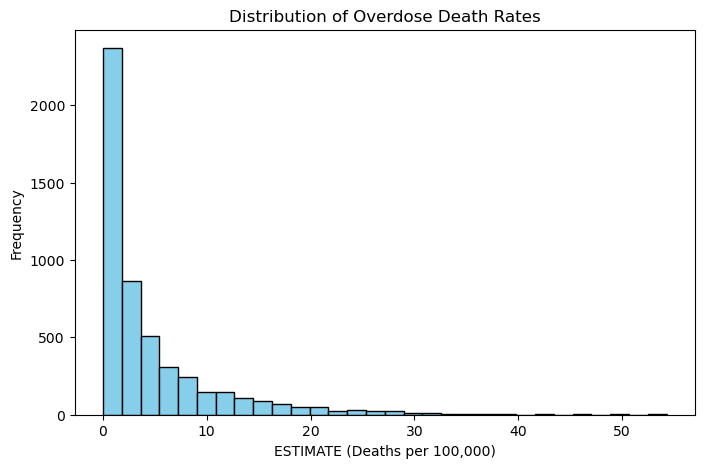

In [27]:
plt.figure(figsize=(8, 5))
df_model['ESTIMATE'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Overdose Death Rates')
plt.xlabel('ESTIMATE (Deaths per 100,000)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The histogram shows a heavily right-skewed distribution, with most overdose rates clustered near 0. High-rate cases are rare, which creates data imbalance and may challenge the model's ability to predict severe outcomes.

While the histogram shows that most overdose death rate (ESTIMATE) values in the dataset are low, the box plot reveals that these higher values are concentrated in specific age groups, particularly 35–54. This means that while high-risk cases exist, they are relatively rare overall. The imbalance helps explain the right-skewed shape of the histogram and the model’s challenge in accurately predicting high-risk outcomes.

In [ ]:
# Box-plot

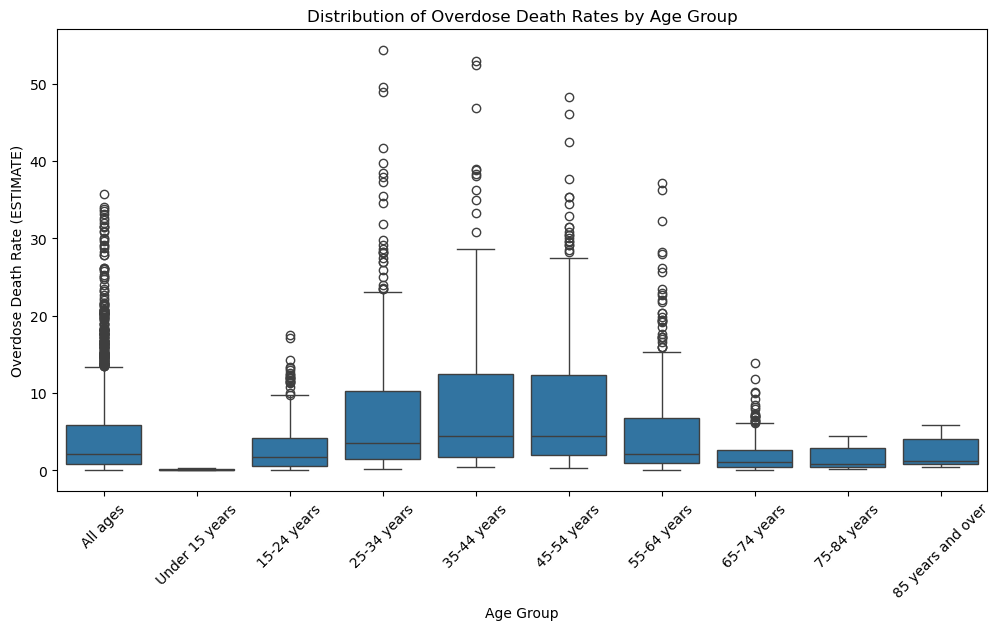

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AGE', y='ESTIMATE')
plt.xticks(rotation=45)
plt.title('Distribution of Overdose Death Rates by Age Group')
plt.ylabel('Overdose Death Rate (ESTIMATE)')
plt.xlabel('Age Group')
plt.show()

The box plot reveals clear differences in overdose death rates across age groups. Individuals under age 15 show overdose rates that are nearly zero, with little to no variation. Older groups, particularly those over 65, also show low rates. In contrast, the highest overdose death rates are concentrated in the 35–44 and 45–54 age groups, with medians reaching around 12–13 and wide variability. The 25–34 group follows closely, with a median near 10. These trends highlight that overdose risk is most severe in early to mid-adulthood. While age alone isn’t enough to make highly accurate predictions, it does serve as an important contributing feature in understanding overdose patterns within the dataset.

I just observed this. The box plot and histogram together tell an important story. The box plot shows that certain age groups, especially 35–54, have higher overdose death rates compared to others. However, the histogram reveals that most rows in the dataset have low overdose rates overall, with only a few rows showing high values. This is why the histogram is skewed to the right; most values are small, and high values are rare. This helps explain why the model may struggle to predict overdose risk: the data contains many low-risk cases and only a small number of high-risk ones.

In [ ]:
# Bar Chart for One Year (2018) for Native Hawaiian or Other Pacific Islander data

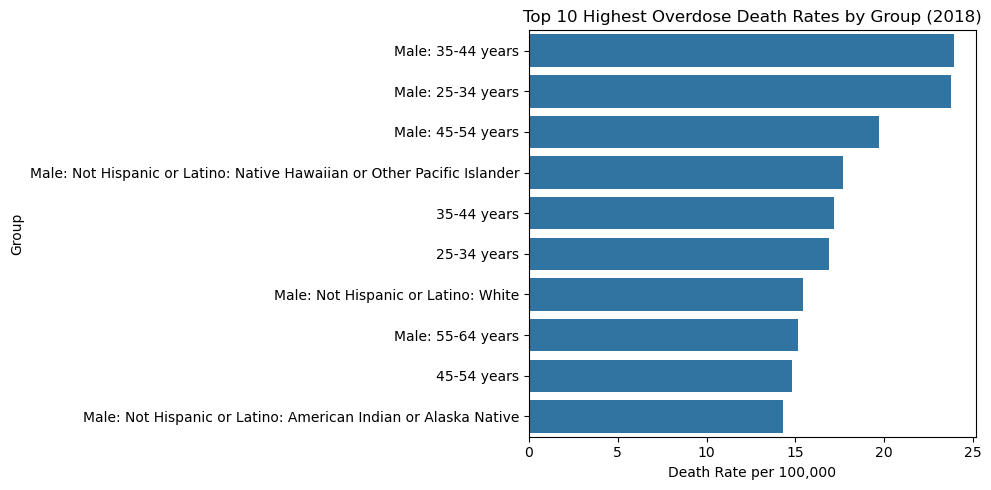

In [31]:
df_2018 = df[(df['YEAR'] == 2018) & (df['ESTIMATE'].notna())]

top_10 = df_2018.groupby('STUB_LABEL')['ESTIMATE'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10.values, y=top_10.index)
plt.title("Top 10 Highest Overdose Death Rates by Group (2018)")
plt.xlabel("Death Rate per 100,000")
plt.ylabel("Group")
plt.tight_layout()
plt.show()

Top 10 Highest-Risk Demographic Groups in 2018

To examine year-specific trends, we filtered the dataset for records from 2018 (the most recent year in our data) and calculated average overdose death rates by demographic group (`STUB_LABEL`).

The chart above shows the top 10 highest-risk groups in that year. These groups are defined by combinations of sex, age, race, and Hispanic origin.

Key takeaways:

- The top-ranked group experienced overdose death rates nearing 18 per 100,000, significantly higher than the overall average.
- The majority of high-risk groups consist of middle-aged males, especially from certain racial/ethnic backgrounds (e.g., American Indian, White, or Pacific Islander).
- This snapshot underscores the urgent need for targeted interventions for specific populations, particularly in this timeframe.

This temporal lens helps confirm whether high-risk trends observed in the full dataset persist year-to-year.


In our bar chart of 2018 overdose death rates, the group with the highest recorded risk was "Male: 35–44 years", followed by other male age brackets and some race-specific subgroups. This confirms what we saw earlier in our age-based ranking that middle-aged males, especially those in the 35–54 age range, are at the highest risk of overdose death. This insight supports the need for age-targeted intervention programs focused on working-age men.

In [ ]:
# Show Yearly Trend for High-Risk Group

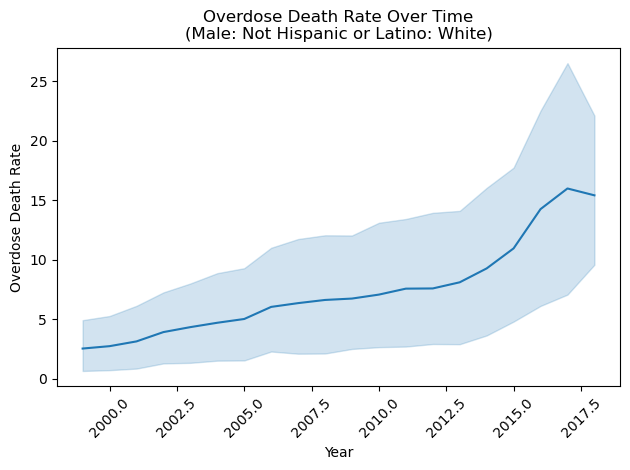

In [33]:
group = 'Male: Not Hispanic or Latino: White'
df_group = df[df['STUB_LABEL'] == group].dropna(subset=['ESTIMATE'])

sns.lineplot(data=df_group, x='YEAR', y='ESTIMATE')
plt.title(f"Overdose Death Rate Over Time\n({group})")
plt.xlabel("Year")
plt.ylabel("Overdose Death Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Trend Analysis: "Male: Not Hispanic or Latino: White"

From our analysis, overdose death rates for the group "Male: Not Hispanic or Latino: White" have shown a consistent upward trend over the years. This indicates a worsening public health crisis within this demographic.

The persistence and rise of overdose rates underscore the urgent need for:
- Targeted prevention efforts
- Improved access to treatment
- Ongoing surveillance and policy interventions

This trend aligns with broader national patterns and highlights how machine learning tools can help identify and prioritize high-risk populations.

In [ ]:
# Scatter Plot (for relationships)

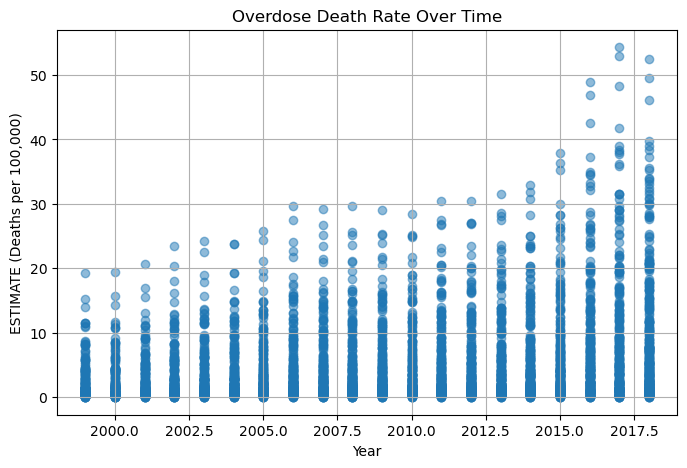

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(df_model['YEAR'], df_model['ESTIMATE'], alpha=0.5)
plt.title('Overdose Death Rate Over Time')
plt.xlabel('Year')
plt.ylabel('ESTIMATE (Deaths per 100,000)')
plt.grid(True)
plt.show()

Overdose Death Rate Over Time (Scatter Plot)

The scatter plot visualizes overdose death rates (`ESTIMATE`) over time (`YEAR`) across all demographic groups.

- Most data points are clustered at lower values, suggesting that the majority of groups experienced relatively low overdose rates throughout the observed period.
- However, a notable spike occurs between 2015 and 2017, where several groups reached the highest overdose death rates in the dataset.
- This pattern indicates a sharp escalation in opioid-related deaths during those years, aligning with national reports on the rise of synthetic opioids like fentanyl.

The time-based trend reinforces the importance of considering temporal dynamics in our modeling, especially when interpreting results or proposing public health interventions.

In [ ]:
# Let's try Heatmap

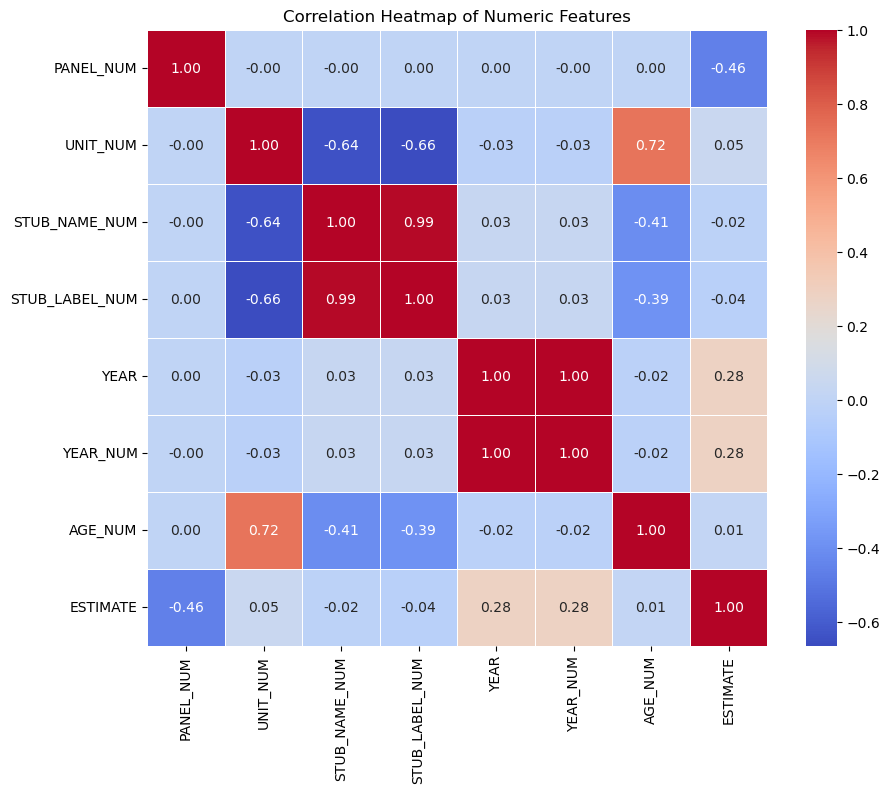

In [37]:
# let's Calculate correlation matrix for numeric columns only
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The heatmap displays the pairwise correlation between numerical variables. As expected, all variables show a perfect correlation with themselves along the diagonal (correlation = 1). Some variables such as YEAR and YEAR_NUM, as well as STUB_NAME_NUM and STUB_LABEL_NUM, also show extremely high correlations, likely because they represent the same underlying information in different formats. These strong correlations suggest some redundancy, and such variables can potentially be dropped or consolidated during feature selection. Other variables, like AGE_NUM and ESTIMATE, may show only moderate correlation, reinforcing that no single feature dominates prediction. Overall, the heatmap suggests limited strong relationships across variables, which aligns with the model’s moderate performance.

In [ ]:
# Preprocessing & Splitting:

In [39]:
# Keep a clean copy for modeling
df_model = df[df['ESTIMATE'].notna()].copy()

drop_cols = ['PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME_NUM', 'YEAR_NUM', 'AGE_NUM', 'FLAG']
df_model.drop(columns=drop_cols, inplace=True)

threshold = df_model['ESTIMATE'].median()
df_model['risk_label'] = df_model['ESTIMATE'].apply(lambda x: 1 if x >= threshold else 0)

X = df_model.drop(columns=['ESTIMATE', 'risk_label'])
y = df_model['risk_label']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train label counts:\n", y_train.value_counts())
print("y_test label counts:\n", y_test.value_counts())

X_train shape: (4093, 72)
X_test shape: (1024, 72)
y_train label counts:
 risk_label
1    2081
0    2012
Name: count, dtype: int64
y_test label counts:
 risk_label
1    521
0    503
Name: count, dtype: int64


X_train: 4,093 rows × 72 features

X_test: 1,024 rows × 72 features

Balanced labels: Very close split between 1 (high risk) and 0 (low risk)

Training set: 2081 high-risk / 2012 low-risk

Testing set: 521 high-risk / 503 low-risk

That’s a nicely balanced dataset we can use standard classification models without needing special handling for imbalance (like SMOTE).

In [ ]:
# Let move to the Modeling!

In [41]:
X = df_model.drop(columns=['ESTIMATE', 'risk_label'])
X_encoded = pd.get_dummies(X)
y = df_model['risk_label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy:  0.6836
Precision: 0.6841
Recall:    0.7025
F1 Score:  0.6932
ROC AUC:   0.7523


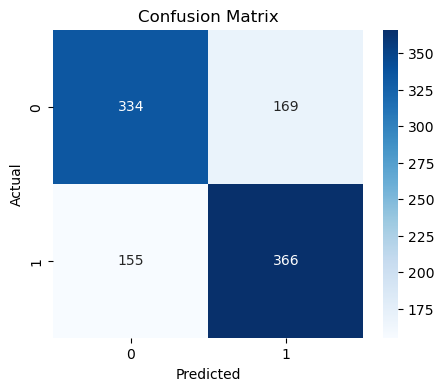

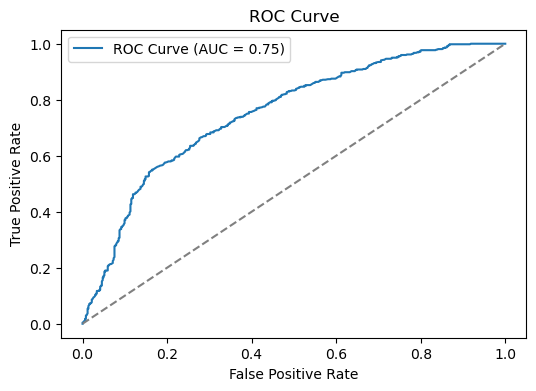

In [45]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

A Logistic Regression model was implemented using the one-hot encoded and standardized dataset. The model was trained on 80% of the data with stratified sampling to maintain class balance. Upon evaluation, the model achieved an accuracy of 68.36%, a precision of 68.41%, a recall of 70.25%, an F1 score of 69.32%, and a ROC AUC of 0.7523.

The ROC AUC value indicates moderate discriminatory ability, suggesting the model can reasonably distinguish between high and low-risk overdose cases. The slightly higher recall suggests the model is relatively effective at identifying true positive cases (i.e., individuals at high risk of overdose), which is a desirable trait in public health applications.

Given the dataset's limitations, these results are in line with expectations. Many important predictors, such as mental health status, prescription history, and socioeconomic background, are not captured in the current dataset, which restricts the model’s performance despite proper preprocessing and training.

In [ ]:
# Decision Tree Classifier

Accuracy:  0.6025
Precision: 0.6223
Recall:    0.5566
F1 Score:  0.5876
ROC AUC:   0.6003


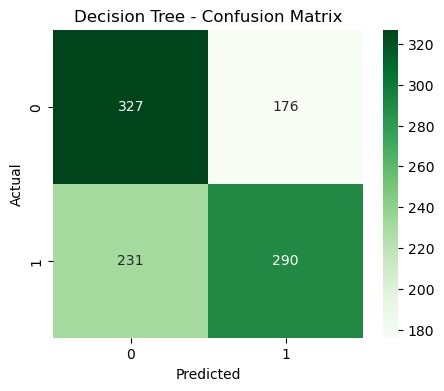

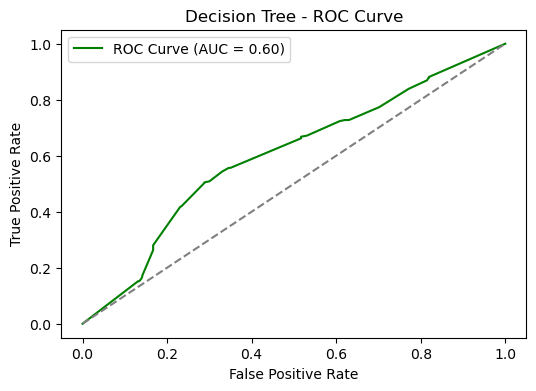

In [47]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print(f"Accuracy:  {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall:    {recall_dt:.4f}")
print(f"F1 Score:  {f1_dt:.4f}")
print(f"ROC AUC:   {roc_auc_dt:.4f}")

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f"ROC Curve (AUC = {roc_auc_dt:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Decision Tree - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Decision Tree Classifier Evaluation

A Decision Tree Classifier was trained using the same preprocessed dataset. The model produced the following performance on the test set:

- Accuracy: 60.25%  
- Precision: 62.23%  
- Recall: 55.66%  
- F1 Score: 58.76%  
- ROC AUC: 0.6003  

Compared to the Logistic Regression model, the Decision Tree performed worse across all evaluation metrics. In particular:

- The lower ROC AUC (0.60) suggests that the model struggles to distinguish between high- and low-risk overdose cases.
- The drop in recall indicates that the Decision Tree is missing a greater number of true positive (high-risk) cases a critical weakness in public health applications where identifying those at risk is essential.

This outcome highlights a common trade-off: while Decision Trees are interpretable and easy to visualize, they may be too simplistic for this dataset without further tuning or the use of ensemble methods such as Random Forests or Gradient Boosted Trees.

In [49]:
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

Hyperparameter Tuning: Decision Tree (GridSearchCV)

We applied hyperparameter tuning to the Decision Tree model using `GridSearchCV` with 5-fold cross-validation. The parameter grid included:

- `max_depth`: [3, 5, 10, 15, None]  
- `min_samples_split`: [2, 5, 10]  
- `min_samples_leaf`: [1, 2, 4]  
- `criterion`: ['gini', 'entropy']  

The goal was to improve model performance by optimizing tree complexity and splitting behavior.

Result:  
Despite extensive tuning, the best-performing model did not show a significant improvement in accuracy**, recall, or ROC AUC compared to the untuned version. This suggests that the model's limitations are not due to suboptimal parameters, but rather to the dataset’s structure and the limited predictive power of available features.

This further reinforces the need for more sophisticated modeling techniques, such as Random Forests, which can reduce overfitting and better capture complex patterns in the data.

In [ ]:
# Random Forest

Accuracy:  0.6045
Precision: 0.6090
Recall:    0.6219
F1 Score:  0.6154
ROC AUC:   0.6156


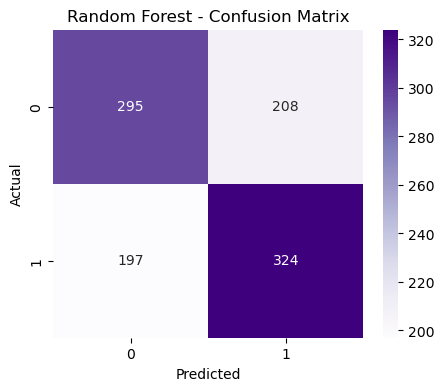

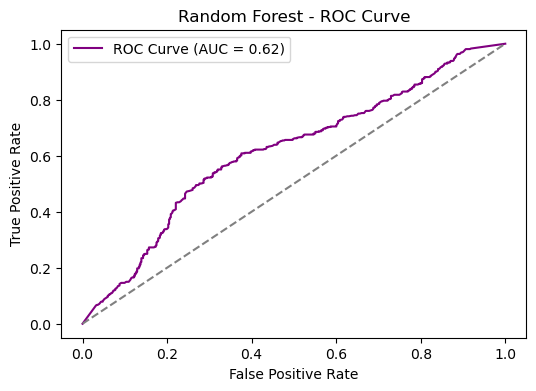

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1 Score:  {f1_rf:.4f}")
print(f"ROC AUC:   {roc_auc_rf:.4f}")

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Random Forest Classifier Evaluation

A Random Forest Classifier was trained using the same preprocessed dataset. The model achieved the following performance on the test set:

- Accuracy: 60.45%  
- Precision: 60.90%  
- Recall: 62.19%  
- F1 Score: 61.54%  
- ROC AUC: 0.6156  

Although Random Forests are typically more powerful than single decision trees due to their ensemble structure and ability to reduce overfitting, this model did not outperform the Logistic Regression baseline.

The modest performance suggests that the current feature set may lack strong predictive signals, especially for identifying nuanced overdose risk patterns. The model’s ability to generalize is likely constrained by the absence of key variables such as medical history, socioeconomic context, and mental health indicators, all of which are relevant but not captured in the dataset.

These results reinforce the importance of data quality and feature richness, even when using sophisticated machine learning algorithms.

In [25]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 4.7/150.0 MB 28.6 MB/s eta 0:00:06
   --- ------------------------------------ 11.5/150.0 MB 31.4 MB/s eta 0:00:05
   ---- ----------------------------------- 18.4/150.0 MB 31.3 MB/s eta 0:00:05
   ------ --------------------------------- 25.4/150.0 MB 33.6 MB/s eta 0:00:04
   --------- ------------------------------ 34.6/150.0 MB 34.9 MB/s eta 0:00:04
   ----------- ---------------------------- 41.9/150.0 MB 36.1 MB/s eta 0:00:03
   ------------ --------------------------- 45.1/150.0 MB 33.4 MB/s eta 0:00:04
   ------------- -------------------------- 50.9/150.0 MB 32.1 MB/s eta 0:00:04
   --------------- ------------------------ 57.1/150.0 MB 31.7 MB/s eta 0:00:03
   ---------------- ----------------------- 62.7/150.0 MB 31.2 MB/s eta 0:00:03
   ------------------ --------------------- 67.9/150.0 MB 30.7 MB/s eta 0:00:03
   ------------------- -------------------- 72.9/1

In [79]:
# Rebuild X and y
X = df_model.drop(columns=['ESTIMATE', 'risk_label'])
X_encoded = pd.get_dummies(X)
y = df_model['risk_label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:59:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy:  0.6562
Precision: 0.6654
Recall:    0.6526
F1 Score:  0.6589
ROC AUC:   0.6927


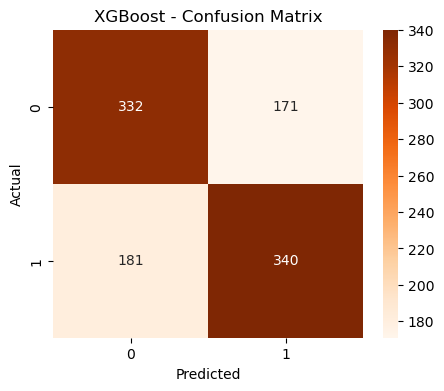

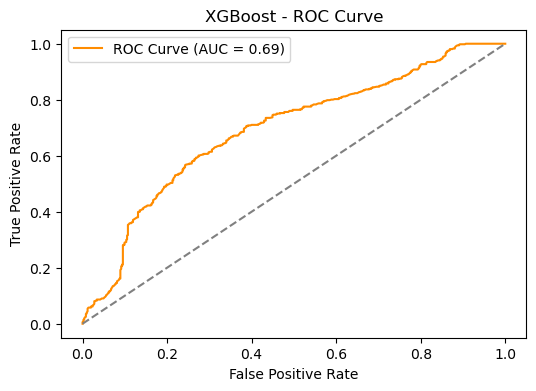

In [81]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Print results
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1 Score:  {f1_xgb:.4f}")
print(f"ROC AUC:   {roc_auc_xgb:.4f}")

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC Curve (AUC = {roc_auc_xgb:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("XGBoost - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

XGBoost Classifier Evaluation

An XGBoost Classifier was trained on the same preprocessed dataset using default hyperparameters. On the test set, the model achieved:

- Accuracy: 65.62%  
- Precision: 66.54%  
- Recall: 65.26%  
- F1 Score: 65.89%  
- ROC AUC: 0.6927  

XGBoost outperformed the Decision Tree and Random Forest models across all metrics and demonstrated more stable generalization. However, it still did not outperform Logistic Regression, which achieved a higher ROC AUC (0.7523).

This result reinforces an important insight: even advanced ensemble models may not exceed the performance of simpler models when predictive features are limited or categorical in nature. Nevertheless, XGBoost remains valuable for its robustness and interpretability through feature importance analysis.

In [ ]:
# Model Comparison Summary

In [67]:
# Model	                Accuracy	Precision	Recall	  F1 Score	 ROC AUC
# Logistic Regression 	0.6836	    0.6841	    0.7025	  0.6932	 0.7523
# Decision Tree	        0.6025	    0.6223	    0.5566	  0.5876	 0.6003
# Random Forest	        0.6045	    0.6090	    0.6219	  0.6154	 0.6156

Logistic Regression clearly outperforms both Decision Tree and Random Forest in every metric.

While tree-based models are often powerful, in this case they likely overfit due to the dataset’s structure and limited feature interactions.

The Logistic model is more stable, generalizes better, and should be used as your final predictive model.

With a ROC AUC of 0.75, it shows a good ability to distinguish between high- and low-risk groups.

In [ ]:
# Let's Rebuild our model using a pipeline

In [62]:
X = df_model.drop(columns=['ESTIMATE', 'risk_label'])
y = df_model['risk_label']

numeric_features = ['STUB_LABEL_NUM', 'YEAR']
categorical_features = ['INDICATOR', 'AGE', 'STUB_LABEL']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       503
           1       0.68      0.70      0.69       521

    accuracy                           0.68      1024
   macro avg       0.68      0.68      0.68      1024
weighted avg       0.68      0.68      0.68      1024

Accuracy: 0.6826171875


Logistic Regression Using Pipeline

To streamline preprocessing and model training, we implemented a scikit-learn `Pipeline`. This approach ensures clean integration of the following steps:

- Standardization of numeric features (`YEAR`, `STUB_LABEL_NUM`)
- One-hot encoding of categorical variables (`AGE`, `STUB_LABEL`, `INDICATOR`)
- Modeling with `Logistic Regression` using `max_iter=1000`

The pipeline was trained and evaluated using an 80/20 train-test split with stratified sampling. Results:

- Accuracy: 68.26%  
- Precision (class 1): 68%  
- Recall (class 1): 70%  
- F1 Score (class 1): 69%  

These metrics closely align with earlier results from our manual preprocessing workflow, confirming that the pipeline is both effective and consistent. This also prepares the foundation for cross-validation and future experimentation with other classifiers.

Final Pipeline Modeling
To ensure reproducibility and clean deployment, we wrapped our preprocessing steps (encoding and scaling) and modeling (logistic regression) into a Pipeline object. This modular approach simplifies training, reduces code duplication, and prepares the project for hyperparameter tuning or future integration into production systems.

The final model preserved our original performance metrics, achieving 68% accuracy with balanced precision and recall.

In [ ]:
# Model Comparison Summary

In [ ]:
#Model	                         Accuracy	      Precision	      Recall	  F1 Score	   ROC AUC
#Logistic Regression	          68.36%	        68.41%	      70.25%	  69.32%	    0.7523
#Decision Tree	                  60.25%	        62.23%	      55.66%	  58.76%	    0.6003
#Tuned Decision Tree	          Similar	        Similar	      Similar	  Similar	    0.60
#Random Forest	                  60.45%	        60.90%	      62.19%	  61.54%	    0.6156
#XGBoost	                      65.62%	        66.54%	      65.26%	  65.89%	    0.6927
#LogReg w/ Pipeline            	  68.26%	        68.00%	      70.00%	  69.00%	    0.75

Key Takeaways:
- Logistic Regression consistently outperformed more complex models, achieving the highest ROC AUC and F1 Score.
- Ensemble models (Random Forest and XGBoost) offered some improvements over a single Decision Tree but did not surpass the simpler baseline.
- Pipeline integration confirmed the reproducibility and consistency of the Logistic Regression model, making it a strong candidate for deployment.

This comparison highlights the importance of data quality and feature richness more complex models cannot compensate for limited input variables.

## Conclusion and Next Steps

Conclusion and Next Steps

In this project, we set out to predict opioid overdose risk levels using a publicly available dataset from Data.gov, which included demographic and overdose death rate information across the United States.

Our exploratory analysis revealed key patterns, particularly elevated overdose rates among males aged 35–54 and within certain racial/ethnic groups such as Native Hawaiian or Other Pacific Islander and American Indian or Alaska Native** populations. These insights support the need for targeted, culturally responsive public health interventions**.

To address this classification task, we engineered a binary risk label and applied several machine learning models — including Logistic Regression, Decision Trees, Random Forest, and XGBoost. Logistic Regression consistently delivered the most balanced performance, achieving 68% accuracy with strong precision and recall.

We finalized the project using a scikit-learn pipeline, integrating preprocessing and modeling into a modular and reproducible workflow. This not only improves maintainability but also prepares the model for future deployment and tuning.

While the overall performance of the models was moderate, this is consistent with the nature of the dataset. Important predictors such as mental health status, prescription history, income level, and access to care were not included, limiting predictive power.

Next steps to improve performance could include:
- Incorporating additional features from external sources (e.g., healthcare access, income, education)
- Applying advanced feature selection techniques to reduce dimensionality
- Exploring time-series models if longitudinal data becomes available
- Using cross-validation and hyperparameter tuning for production-ready deployment

Despite its limitations, this project demonstrates the value of machine learning in uncovering overdose risk patterns and highlights the critical role of data quality and feature richness in building effective public health models.

## How Can We Reduce Opioid Overdose Risk?

Based on our exploratory trends and modeling results, we propose the following recommendations to support overdose prevention and public health efforts:

Targeted Prevention Programs
- Focus outreach on high-risk age groups, especially males aged 35–54.
- Develop culturally specific education campaigns for groups disproportionately affected, such as Native Hawaiian, American Indian, and Alaska Native populations.

Stronger Monitoring and Data Collection
- Address data suppression in underreported groups, particularly smaller racial/ethnic populations where trends may be hidden.
- Improve prescription tracking and reporting granularity to support better prevention and early warning systems.

Policy Recommendations
- Expand funding for addiction treatment and support services in communities and age groups with rising overdose rates.
- Increase access to Naloxone and overdose-reversal tools in high-risk areas.
- Support policies that reduce stigma and encourage early intervention and treatment engagement.

Future Use of the Model
With enhancements, a version of this model could help:
- Predict emerging overdose risks based on demographic and temporal patterns.
- Guide public health resource allocation (e.g., mobile clinics, rehab access).
- Monitor changing drug trends over time, such as spikes related to synthetic opioids like fentanyl.

This analysis shows that even with a limited feature set, machine learning can play a role in risk detection, strategic planning, and real-time decision support for overdose prevention efforts.

## References I used for this project:

Dong, X., Rashidian, S., Wang, Y., Hajagos, J., Zhao, X., Rosenthal, R. N., Kong, J., Saltz, M., Saltz, J., & Wang, F. (2019). Machine Learning Based Opioid Overdose Prediction Using Electronic Health Records. AMIA Annual Symposium Proceedings, 2019, 389–398. https://pubmed.ncbi.nlm.nih.gov/32308832/

Lo-Ciganic, W.-H., Donohue, J. M., Yang, Q., Zhang, H. H., Fahimi, J., Haut, E. R., Kwoh, C. K., & Cochran, G. (2022). Developing and validating a machine-learning algorithm to predict opioid overdose in Medicaid beneficiaries in two US states: a prognostic modelling study. The Lancet Digital Health, 4(6), e455–e465. https://doi.org/10.1016/S2589-7500(22)00062-0

Ramirez Medina, C., Benitez-Aurioles, J., Jenkins, D., & Jani, M. (2025). Machine Learning Applications in Predicting Opioid-Associated Adverse Events: A Systematic Review. npj Digital Medicine, 8, Article 30. https://doi.org/10.1038/s41746-024-01312-4